# Is working ok Now


### iris.CSV
### The classification result is good now
### Saved and recalled model
### Deployed as web application see folder for other files



In [2]:
# Imports
import torch
import torchvision # torch package for vision related things
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
#import torchvision.datasets as datasets  # Standard datasets
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
#from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from torchvision.io import read_image
import seaborn as sns
import sklearn
import random

Here we create our simple neural network. For more details here we are subclassing and
inheriting from nn.Module, this is the most general way to create your networks and
allows for more flexibility. I encourage you to also check out nn.Sequential which
would be easier to use in this scenario but I wanted to show you something that
"always" works.

In [3]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__() #Override the init method
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        self.fc1 = nn.Linear(input_size,11 )
        #self.fc2 = nn.Linear(10, 6)
        self.fc2 = nn.Linear(11, num_classes)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = (self.fc2(x))
        #x = (self.fc3(x))
        return x
       


x here is the mnist images and we run it through fc1, fc2, fc3 that we created above.
we also add a ReLU activation function in between and for that (since it has no parameters)
I recommend using nn.functional (F)

[Hyperlink to Datasets and Dataloader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

[Hyperlink to CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)


In [4]:
class mdataset(Dataset):
    """ Pytorch Dataloader Class for wine.csv type"""

    def __init__(self, csv):
        #file = pd.read_csv(csv)         
        #self.xy = file
        self.xy=csv
        #print(self.xy)

    def __len__(self):
        return len(self.xy)

    def __getitem__(self, index):
        x_data = torch.Tensor(self.xy.iloc[:, :-1].values)
        #print(x_data)
        y_str=(self.xy.iloc[:, -1:].values)
        #print(y_str)        
        y_str = torch.Tensor(y_str)
        
        #Manipulate data if any
        #x_data[index,12] = x_data[index,12]/1000
        #x_data[index,4] = x_data[index,4]/100
        
        return x_data[index], y_str[index]
       
        

In [5]:
file=pd.read_csv('iris.csv')
file.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
file.shape

(150, 5)

In [7]:
print(file['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [8]:
file.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
file.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
newdata=file

In [11]:
newdata.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Example of one hot encoding but we will not use it

In [12]:
# newdata=pd.get_dummies(newdata,drop_first=True)


In [31]:
# newdata.head()

In [14]:
newdata=file

In [15]:
newdata["variety"] = newdata["variety"].astype('category')
newdata.dtypes

sepal.length     float64
sepal.width      float64
petal.length     float64
petal.width      float64
variety         category
dtype: object

In [16]:
newdata["variety_cat"] = newdata["variety"].cat.codes
newdata.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_cat
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


classific = {'Setosa': 0,'Versicolor': 1,'Virginica':2}
  
        # traversing through dataframe
        # Gender column and writing
        # values where key matches
newdata.variety = [classific[item] for item in newdata.variety]
newdata.head()


In [17]:
newdata.drop(['variety'],axis=1,inplace=True)

In [18]:
newdata.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_cat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
newdata.corr()

,sepal.length,sepal.width,petal.length,petal.width,variety_cat
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety_cat,0.782561,-0.426658,0.949035,0.956547,1.000000


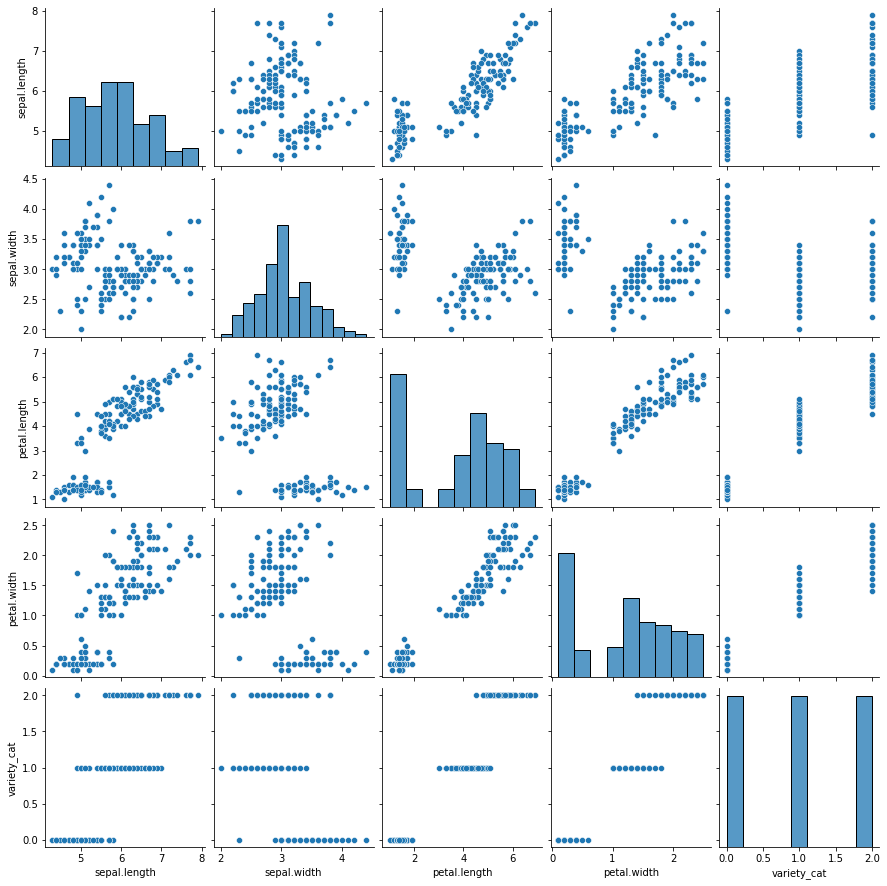

In [20]:
sns.pairplot(newdata)

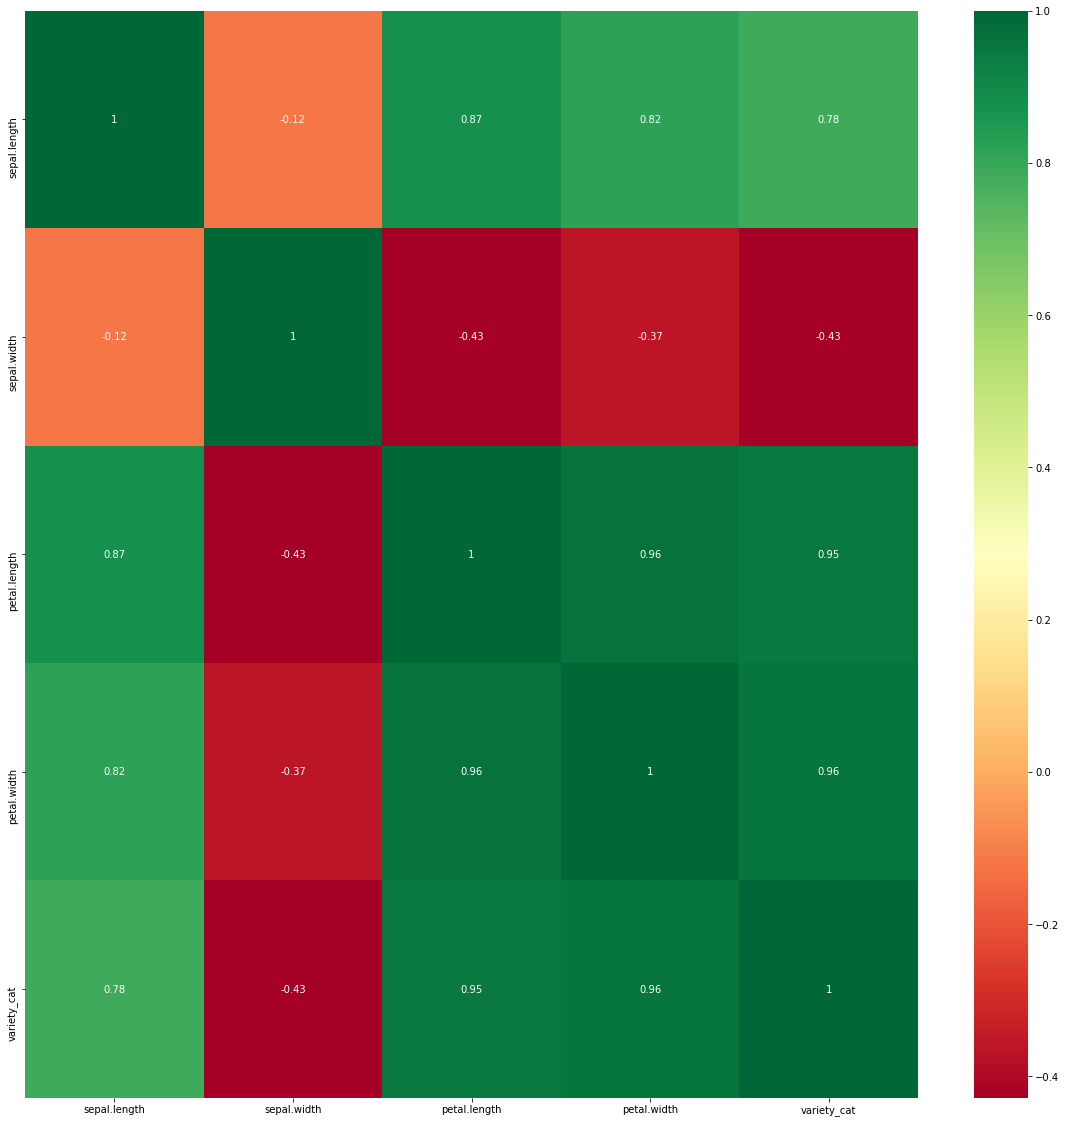

In [21]:
corrmat=newdata.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map 
g=sns.heatmap(newdata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
randata = newdata.sample(frac=1)
randata.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_cat
117,7.7,3.8,6.7,2.2,2
28,5.2,3.4,1.4,0.2,0
71,6.1,2.8,4.0,1.3,1
98,5.1,2.5,3.0,1.1,1
34,4.9,3.1,1.5,0.2,0


In [23]:
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(dset.x_data(),dset.y_str(),test_size=0.2)

train,test=train_test_split(randata,test_size=0.2)


In [24]:
train.shape
test.shape

(30, 5)

In [25]:
test.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_cat
105,7.6,3.0,6.6,2.1,2
19,5.1,3.8,1.5,0.3,0
7,5.0,3.4,1.5,0.2,0
107,7.3,2.9,6.3,1.8,2
32,5.2,4.1,1.5,0.1,0


In [32]:


# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters of our neural network which depends on the dataset, and
# also just experimenting to see what works well (learning rate for example).
input_size = 4 # 28 x 28
num_classes = 3  #output classification 0,1...9
learning_rate = 0.01
batch_size = 15
test_size=1
num_epochs = 20
count = 0 # My  variable
tdata = []
tresult=[]
trainxy = mdataset(train)
testxy = mdataset(test)

train_loader = DataLoader(
    dataset=trainxy,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0) #num_workers=0
test_loader = DataLoader(
    dataset=testxy,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0) #num_workers=0

#num_classes is the output classification 0 to 9 is 10 classes
model = NN(input_size=input_size, num_classes=num_classes).to(device)

# The way the loss is to be computed
criterion = nn.CrossEntropyLoss()
#criterion=nn.L1Loss()
#criterion=nn.MSELoss()

# The way the Optim will work
#model.parameters() extracted from model

#optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=.9)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train Network
for epoch in range(num_epochs):
    #batch_idx is index of each batch. # data, targets are extracted from train_loader
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        #print(batch_idx,data)
        # 1 Get data to cuda/cpu if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        targets = torch.reshape(targets, (-1,))
        model.train()
        # 3 forward pass
        scores = model(data)
        #print(scores)
        
        #Yt_train = Yt_train.type(torch.LongTensor)
        targets = targets.type(torch.LongTensor)
        #print(targets)
        
        # scores shape
        #tensor([[-0.9183, -0.1778, -1.0508],
        #[-1.1223, -0.1852, -1.1994],
        #[ 0.0970, -0.5318, -0.5893],
        
        #targets shape
        #tensor([0, 0, 2, 2, 0, 2, 1, 2, 1, 1])
        
        loss = criterion(scores,targets)
        #print(loss) # use the batch to find the composite loss
        # 4 backward
        optimizer.zero_grad()
        loss.backward() #adjust weight based on batch size
   
        # 5 gradient descent or adam step
        optimizer.step()



100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 173.80it/s]


In [27]:
(data,targets) = trainxy[40]
print(data)
scores = model(data)
print(scores)
print(torch.argmax(scores)) #predictions is the second value returned
#print(predictions)
print(targets)


tensor([6.9000, 3.1000, 5.4000, 2.1000])
tensor([-1.9221, -0.7217, -0.2829], grad_fn=<AddBackward0>)
tensor(2)
tensor([2.])


Extracting the data to single array - Prabhu

Displaying a single image and its classification by NN - Prabhu


Now checking the accuracy using the data set

d:\jpy\python 3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\jpy\python 3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\jpy\python 3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

Accuracy on training set: 96.67
Accuracy on test set: 100.00


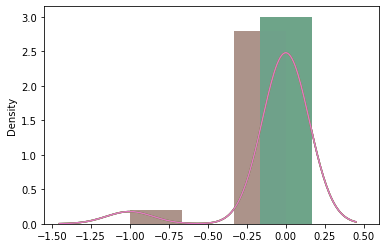

In [33]:

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
        
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)
            y = torch.reshape(y, (-1,))
            #print(x)
            scores = model(x)
            #print(scores)
            _, predictions = scores.max(1)
            #predictions = (torch.argmax(scores))
            #print(predictions)
            #print(y)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            sns.distplot(y-predictions)

    #model.train()
    return num_correct/num_samples


print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

In [29]:
path="iris_ml_model"
torch.save(model,path)

In [30]:
path="iris_ml_model"
smodel = torch.load(path)
data =torch.FloatTensor ([3,4,5,2])
score=smodel(data)
print(score)
print(torch.argmax(score))

tensor([-0.5920, -0.7545, -0.6294], grad_fn=<AddBackward0>)
tensor(0)
